<a href="https://colab.research.google.com/github/pmazumder3927/COGS-118B-Final/blob/main/Cogs118B_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import normalize

# Utility functions

In [ ]:
# [Vsort,Dsort] = eigsort(V, eigvals)
#
# Sorts a matrix eigenvectors and a array of eigenvalues in order 
# of eigenvalue size, largest eigenvalue first and smallest eigenvalue
# last.
#
# Example usage:
# di, V = np.linarg.eig(L)
# Vnew, Dnew = eigsort(V, di)
#
# Tim Marks 2002
def eigsort(V, eigvals):
    
    # Sort the eigenvalues from largest to smallest. Store the sorted
    # eigenvalues in the column vector lambd.
    lohival = np.sort(eigvals)
    lohiindex = np.argsort(eigvals)
    lambd = np.flip(lohival)
    index = np.flip(lohiindex)
    Dsort = np.diag(lambd)
    
    # Sort eigenvectors to correspond to the ordered eigenvalues. Store sorted
    # eigenvectors as columns of the matrix vsort.
    M = np.size(lambd)
    Vsort = np.zeros((M, M))
    for i in range(M):
        Vsort[:,i] = V[:,index[i]]
    return Vsort, Dsort

In [ ]:
# viewcolumn(columnvector);
# VIEWCOLUMN Displays a 60 x 60 grayscale image stored in a column vector.
# Tim Marks 2002

def viewcolumn(columnvector):
    plt.imshow(columnvector.reshape([60, 60], order='F'), cmap=plt.get_cmap('gray'))
# normc(M) normalizes the columns of M to a length of 1.

def normc(Mat):
    return normalize(Mat, norm='l2', axis=0)

In [ ]:
def plotCurrent(X, Rnk, Kmus):
    N, D = X.shape
    K = Kmus.shape[0]

    InitColorMat = np.array([[1, 0, 0],
                             [0, 1, 0],
                             [0, 0, 1],
                             [0, 0, 0],
                             [1, 1, 0],
                             [1, 0, 1],
                             [0, 1, 1]])

    KColorMat = InitColorMat[0:K,:]

    colorVec = np.dot(Rnk, KColorMat)
    muColorVec = np.dot(np.eye(K), KColorMat)
    plt.scatter(X[:,0], X[:,1], c=colorVec)

    plt.scatter(Kmus[:,0], Kmus[:,1], s=200, c=muColorVec, marker='d')
    plt.axis('equal')
    plt.show()

In [ ]:
def plotCurrentGMM(X, Rnk, Kmus, sigma):
    N, D = X.shape
    K = Kmus.shape[0]

    InitColorMat = np.array([[1, 0, 0],
                             [0, 1, 0],
                             [0, 0, 1],
                             [0, 0, 0],
                             [1, 1, 0],
                             [1, 0, 1],
                             [0, 1, 1]])

    KColorMat = InitColorMat[0:K,:]

    colorVec = np.dot(Rnk, KColorMat)
    muColorVec = np.dot(np.eye(K), KColorMat)
    plt.figure(figsize=(10,10))
    ax = plt.gca()
    x,y = np.meshgrid(np.sort(X[:,0]),np.sort(X[:,1]))
    XY = np.array([x.flatten(),y.flatten()]).T
    plt.title("EM Final Clustering")
    for m,c in zip(Kmus, sigma):
        multi_normal = multivariate_normal(mean=m,cov=c)
        cnt = ax.contourf(np.sort(X[:,0]),np.sort(X[:,1]),multi_normal.pdf(XY).reshape(len(X),len(X)),alpha=0.3,levels=np.arange(0,1, 0.1), antialiased=True)
        ax.scatter(m[0],m[1],c='grey',zorder=10,s=100)
    plt.scatter(X[:,0], X[:,1], c=colorVec)
    plt.scatter(Kmus[:,0], Kmus[:,1], c=muColorVec, marker='d')
    plt.show()
    return r

# Loading/preprocessing data

In [ ]:
use_h_not_c = False

In [ ]:
heart_df = pd.read_csv('https://pastebin.com/raw/eUiVmczJ' if use_h_not_c else 'https://pastebin.com/raw/ig1Mktq2')
heart_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
heart_categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'] if use_h_not_c else ['Gender']
heart_drop_cols = ['HeartDisease'] if use_h_not_c else ['CustomerID']
# flip this switch for testing
use_categorical_cols = True

if use_categorical_cols:
  # one-hot encoding
  heart_df_dummies = pd.get_dummies(heart_df, columns=heart_categorical_cols)
  # remove the N from the binary categories
  # heart_df_dummies.drop(['ExerciseAngina_N'])
else:
  heart_df_dummies = heart_df.drop(columns=heart_categorical_cols)

heart_df_dummies = heart_df_dummies.drop(columns=heart_drop_cols)

heart = heart_df_dummies.to_numpy()

In [ ]:
heart_colnames = heart_df_dummies.columns
heart_colnames

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

# Principal Component Analysis

In [ ]:
# perform PCA
heart_mean = np.mean(heart, axis=0)
heart_ctr = heart - heart_mean
h_eigvals_uns, h_eigvecs_uns = np.linalg.eig(heart_ctr.T @ heart_ctr)
h_eigvecs, h_eigvals_diagmat = eigsort(h_eigvecs_uns, h_eigvals_uns)
h_eigvals_arr = np.diagonal(h_eigvals_diagmat)
heart_pc = heart_ctr @ h_eigvecs
heart_pc = normc(heart_pc)
h_eigvals_arr

array([1.39352637e+05, 1.36182376e+05, 3.32786186e+04, 9.77079704e+01,
       6.43109871e-13])

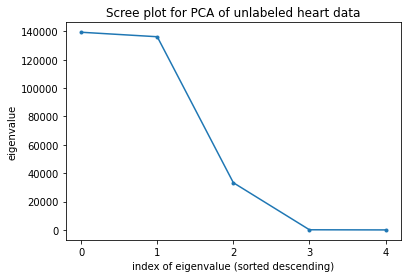

In [ ]:
# scree plot
plt.plot(h_eigvals_arr, marker=".")
plt.xticks(range(h_eigvals_arr.shape[0]))
plt.title("Scree plot for PCA of unlabeled heart data")
plt.xlabel("index of eigenvalue (sorted descending)")
plt.ylabel("eigenvalue")
plt.show()

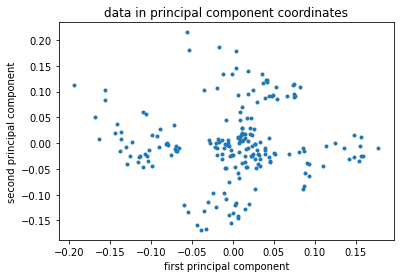

In [ ]:
# visualize the first 2 principal components
plt.scatter(heart_pc.T[0], heart_pc.T[1], marker=".")
plt.title("data in principal component coordinates")
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.show()

# Gaussian Mixture Model

## K-Means and GMM functions

In [ ]:
# functions for runKmeans, necessary to find initial Kmus for running GMM

def calcSqDistances(X, Kmus):
    N = len(X)
    K = len(Kmus)

    result = [ [0 for i in range(K)] for j in range(N) ]

    for n in range(N):
        for k in range(K):
            squareDist = np.linalg.norm(X[n]-Kmus[k], 2) ** 2
            result[n][k] = squareDist
    return result

def determineRnk(sqDmat):
    result = np.full_like(sqDmat, 0)

    for n in range(len(sqDmat)):
        index_closestK = sqDmat[n].index(min(sqDmat[n]))
        result[n][index_closestK] = 1
    
    return result

def recalcMus(X, Rnk):
    # Fill this
    result = [0 for i in range(len(Rnk[0]))]

    for k in range(len(Rnk[0])):
        numerator = 0
        denominator = 0
        for n in range(len(Rnk)):
            numerator += X[n] * Rnk[n][k]
            denominator += Rnk[n][k]
        result[k] = numerator/denominator

    return np.asarray(result)

def runKMeans(K,X ):
    #load data file specified by fileString from Bishop book
    # X = np.loadtxt(fileString, dtype='float')

    #determine and store data set information
    N, D = X.shape

    #allocate space for the K mu vectors
    Kmus = np.zeros((K, D))

    #initialize cluster centers by randomly picking points from the data
    rand_inds = np.random.permutation(N)
    Kmus = X[rand_inds[0:K],:]

    #specify the maximum number of iterations to allow
    maxiters = 100000

    for iter in range(maxiters):
        #assign each data vector to closest mu vector as per Bishop (9.2)
        #do this by first calculating a squared distance matrix where the n,k entry
        #contains the squared distance from the nth data vector to the kth mu vector

        #sqDmat will be an N-by-K matrix with the n,k entry as specfied above
        sqDmat = calcSqDistances(X, Kmus)

        #given the matrix of squared distances, determine the closest cluster
        #center for each data vector

        #R is the "responsibility" matrix
        #R will be an N-by-K matrix of binary values whose n,k entry is set as
        #per Bishop (9.2)
        #Specifically, the n,k entry is 1 if point n is closest to cluster k,
        #and is 0 otherwise
        Rnk = determineRnk(sqDmat)

        KmusOld = Kmus
        # plotCurrent(X, Rnk, Kmus)
        # time.sleep(1)

        #recalculate mu values based on cluster assignments as per Bishop (9.4)
        Kmus = recalcMus(X, Rnk)

        #check to see if the cluster centers have converged.  If so, break.
        if np.sum(np.abs(KmusOld.reshape((-1, 1)) - Kmus.reshape((-1, 1)))) < 1e-6:
            # print(iter)
            break

    return Rnk, Kmus

In [ ]:
# helper functions and code to run Gaussian mixture model

def calcRespons(X, N, D, K, mu, prior, cov):
    # cov = np.diag(cov)
    gamma = np.zeros((N, K), dtype=np.float32)
    for cluster in range(K):
        # pi_k * N(X; mu_k, cov_k)
        # print(np.shape(mu))
        for i in range(N):
            # multivariatenorm = multivariate_normal.pdf(X[i], mu[cluster], cov[cluster])
            # print(type(multivariatenorm))
            gamma[i, cluster] = multivariate_normal.pdf(X[i], mu[cluster], cov[cluster]) * prior[cluster]
    # divide by sum of pi_j * N(X; mu_j, cov_j)
    gamma = np.divide(gamma, np.sum(gamma, axis=1, keepdims=True))
    return gamma

def recalcParams(X, gamma, N, D, K):
    prior_new = np.sum(gamma, axis=0)/N

    mu_new = np.divide(gamma.T @ X, np.sum(gamma, axis=0, keepdims=True).T)

    cov_temp = np.zeros((K, D))
    for cluster in range(K):
        cov_temp = np.divide(gamma[:,cluster].T @ ((X - mu_new[cluster])*((X-mu_new[cluster]))), np.sum(gamma[:,cluster]))
    cov_new = np.zeros((K, D, D))
    for i in range(K):
        cov_new[i] = np.diag(cov_temp)

    return prior_new, mu_new, cov_new

def runGMM(K, X):
    #load data file specified by fileString from Bishop book
    # X = np.loadtxt(fileString, dtype='float')

    #determine and store data set information
    N, D = X.shape

    #initialize cluster centers by running Kmeans
    Rnk, mu = runKMeans(K, X)

    # initialize prior and covariance
    prior = np.asarray([1/K]*K)
    cov = np.zeros((K, D, D))
    for i in range(K):
        cov[i] = np.identity(D)# + np.array([0.1] * (D * D)).reshape((D,D))

    #specify the maximum number of iterations to allow
    maxiters = 1000
    for iters in range(maxiters):
        gamma = calcRespons(X, N, D, K, mu, prior, cov)
        # plotCurrent(X, gamma, mu)
        prior_new, mu_new, cov_new = recalcParams(X, gamma, N, D, K)

        if np.linalg.norm(mu_new - mu) < 1e-3:
            break

        prior, mu, cov = prior_new, mu_new, cov_new

    return prior_new, mu_new, cov_new, gamma

In [ ]:
def expectation(X, pi, mu, sigma):
    probabilities = np.array([pi_c*multivariate_normal(mean=mu_c, cov=sigma_c).pdf(X) for pi_c, mu_c, sigma_c in zip(pi, mu, sigma)])
    return ( probabilities / np.sum(probabilities, axis=0) ).T

def maximization(r, X, pi, mu, sigma, k):
    # Returns the updated parameters given the current parameters and responsibilities
    N = np.sum(r, axis=0)
    pi = N / np.sum(r)
    # mu = (np.apply_along_axis(lambda r: np.sum(X*r[:, np.newaxis], axis=0) / N, 0, r) ).T
    mu = (r.T @ X)
    for c in range(N.shape[0]):
      mu[c] /= N[c]

    sigma = np.array([ ((1/N[c])*np.dot((r[:,c][:, np.newaxis]*(X-mu[c])).T,(X-mu[c]))) for c in range(k)])
    return pi, mu, sigma

def runGMM(K,X, initialMus=None):
    #determine and store data set information
    N, D = X.shape

    #allocate space for the K mu vectors
    Kmus = np.zeros((K, D))

    #initialize cluster centers by randomly picking points from the data, or by using the initialMus
    if isinstance(initialMus, np.ndarray):
        Kmus = np.array(initialMus)
    else:
        rand_inds = np.random.permutation(N)
        Kmus = X[rand_inds[0:K],:]
    pi = np.ones(K) / K
    sigma = np.zeros((K, D, D))
    for i in range(K):
        np.fill_diagonal(sigma[i], 1)
        # sigma[i] += np.array([0.01] * (D * D)).reshape((D,D))

    #specify the maximum number of iterations to allow
    maxiters = 1000

    for iter in range(maxiters):
        r = expectation(X, pi, Kmus, sigma)
        pi, Kmus, sigma = maximization(r, X, pi, Kmus, sigma, K)
        sigma = np.clip(sigma, 0, None)
        for i in range(K):
            sigma[i] += np.diag(0.001, D)
    colors = np.argmax(r, axis=1)
    plotCurrentGMM(X[:, 0:2], r, Kmus[:, 0:2], sigma[:, 0:2, 0:2])
    return pi, Kmus, sigma, r

## Running GMM (and K-means)

In [ ]:
K = 4

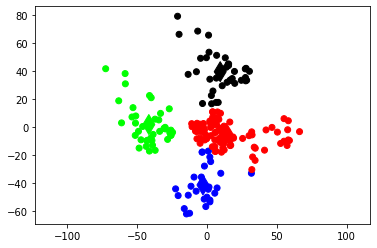

In [ ]:
# run K-means just for fun
Rnk, Kmus = runKMeans(K, heart)
plotCurrent((heart - heart_mean) @ h_eigvecs, Rnk, (Kmus - heart_mean) @ h_eigvecs)

In [ ]:
# run GMM on 2 PCs
# mixture params, means, covariances, responsibility
# print(((Kmus - heart_mean) @ h_eigvecs)[:, 0:3])
pi, mu, cov, r = runGMM(K, heart_pc[:, 0:3], initialMus=((Kmus - heart_mean) @ h_eigvecs)[:, 0:3])
# plotCurrentGMM(heart_pc, r, mu, cov)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


ValueError: ignored

# Messing Around (cut out)

In [ ]:
from sklearn.manifold import TSNE

heart_tsne = TSNE(init='pca', learning_rate='auto').fit_transform(heart)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


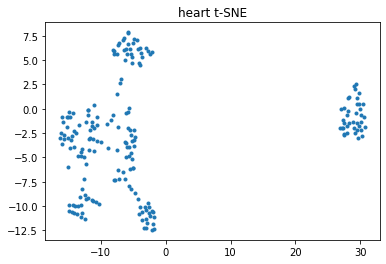

In [ ]:
heart_tsne
plt.scatter(heart_tsne.T[0], heart_tsne.T[1], marker=".")
plt.title("heart t-SNE")
# plt.xlabel("x")
# plt.ylabel("y")
plt.show()